![]()

# B-Spline Interpolation

Kevin J. Walchko, Phd

26 July 2020

---

For calibrating cameras and IMUs, which both run at different sample rates, we need a way to *interpolate* so we can get a value at any point in time. B-Spline is a method used by Kalibr and others to achieve this.

## References

- MIT: [B-Spline Math](http://web.mit.edu/hyperbook/Patrikalakis-Maekawa-Cho/node17.html)
- scipy docs: [B-Spline](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.BSpline.html)
- github: [Python B-Spline Examples](https://github.com/kawache/Python-B-spline-examples)
- github: [Kalibr](https://github.com/ethz-asl/kalibr)
- [Optimization Based IMU Camera Calibration](http://mediatum.ub.tum.de/doc/1287171/1287171.pdf)

In [2]:
import numpy as np
from scipy import interpolate

import matplotlib.pyplot as plt

In [10]:
ctr = np.array( [(3 , 1), (2.5, 4), (0, 1), (-2.5, 4),
                (-3, 0), (-2.5, -4), (0, -1), (2.5, -4), (3, -1)])

x=ctr[:,0]
y=ctr[:,1]

tck,u = interpolate.splprep([x,y],k=3,s=0)
u=np.linspace(0,1,num=50,endpoint=True)
out = interpolate.splev(u,tck)

Text(0.5, 1.0, 'B-Spline interpolation')

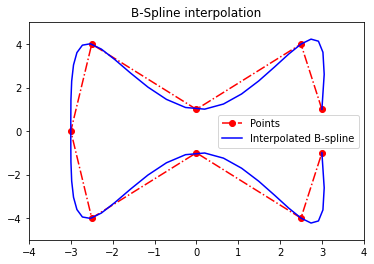

In [11]:
plt.plot(x, y, 'ro-.', out[0], out[1], 'b')
plt.legend(['Points', 'Interpolated B-spline', 'True'],loc='best')
plt.axis([min(x)-1, max(x)+1, min(y)-1, max(y)+1])
plt.title('B-Spline interpolation')